In [26]:
import pandas as pd
import numpy as np
import statistics as stats
import statsmodels.api as sm 
import seaborn as sns
import itertools
import scipy.optimize as optimize
import re
import math
import pydotplus
import statsmodels.formula.api as smf
from statsmodels.nonparametric.kernel_regression import KernelReg
from scipy import stats as st
from random import randint
from scipy.stats import kstest
from matplotlib import pyplot as plt
from scipy.stats import t
from IPython.display import Image, display
from sklearn.externals.six import StringIO
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
%matplotlib inline

In [2]:
data_set = pd.read_csv('telco.csv', sep='	')

1. The lasso regression is an alternative approach to variable selection.
1 (a) Explain in your own words the idea of the lasso regression. Sketch a situation when a simple linear regression fails, but the lasso regression still can be estimated.

The acronym “LASSO” stands for Least Absolute Shrinkage and Selection Operator. Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination. Lasso solve problems in which the number of variables p exceeds the number of observations n.

1. (b) For the usual regression model the variables are rarely normalized/standardized.
However, in the case of the lasso regression the scaling becomes crucial. Why?
Scale your data by (x i − x̄)/σ̂ x . Can/should the binary variCan/should the binary variables be scaled in the
same fashion? How would you handle the variable ed?

The lasso method requires initial standardization of the regressors, so that the penalization scheme is fair to all regressors. For categorical regressors, one codes the regressor with dummy variables and then standardizes the dummy variables. As pointed out by a referee, however, the relative scaling between continuous and categorical variables in this scheme can be somewhat arbitrary.
Lasso regression puts constraints on the size of the coefficients associated to each variable. However, this value will depend on the magnitude of each variable. It is therefore necessary to center and reduce, or standardize, the variables.The result of centering the variables means that there is no longer an intercept.

1. (c) Run a lasso regression for data with α ∈ (0, 1). Plot the estimated parameters
as functions of α. Which value of α would you recommend? If it is easy to
implement, then determine the optimal λ by cross-validation.

In [3]:
df = pd.get_dummies(data_set, columns=['marital','ed', 'churn', 'retire', 'gender']).head()
df.fillna(0, inplace=True)
df = (df - df.mean())/df.std()
df.fillna(0, inplace = True)
X = df.drop(columns=['longmon', 'marital_Unmarried', 'ed_College degree','churn_No','retire_No','gender_Female'])
y = df['longmon'] 

In [4]:
regressor = Lasso(alpha=0.5)
regressor.fit(X, y)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


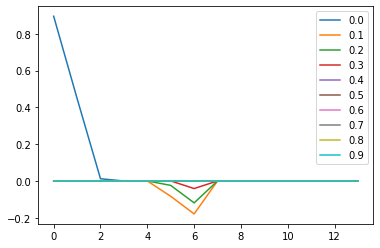

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
plt.clf()
result = pd.DataFrame()

for i in np.arange(0.0, 1.0, 0.1):
    regressor = Lasso(alpha=i)
    regressor.fit(X_train, y_train)
    plt.plot(regressor.coef_, label=round(i, 1))    
plt.legend(loc="top right")    
plt.show()

Coefficients differs mostly from zero for  Alpha is equal to 0.6 and it is the most optimal

In [6]:
plt.clf()
alphas = np.logspace(0, 1, 0.1) 
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    print(a, lasso.coef_)
    
lassocv = linear_model.LassoCV()
lassocv.fit(X, y)
lassocv_score = lassocv.score(X, y)
lassocv_alpha = lassocv.alpha_
print('CV', lassocv.coef_)

CV [ 0.9137916   0.          0.          0.01205257  0.          0.
 -0.          0.          0.          0.          0.         -0.
  0.         -0.02873007]


<Figure size 432x288 with 0 Axes>

In [7]:
lassocv_alpha

0.04561843263884558

2. A nonlinear regression offers a 
exible technique for modelling complex relationships.
We wish to explain the tenure by the long distance calls per month longmon. (a) Make a bivariate scatter plot and estimate an appropriate linear (!) model. Add
the regression line to the plot.

<Figure size 432x288 with 0 Axes>

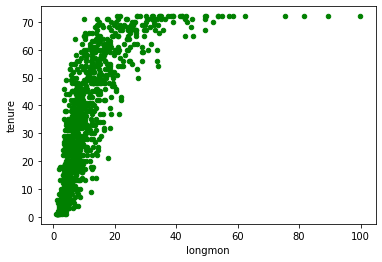

In [8]:
def get_model(power,b0,b1):
    return (b0  + b1 * np.log(x**power))

def residuals(power,b0,b1,PLP):
    return y - get_model(power,b0,b1)

data_set = pd.read_csv('telco.csv', sep='	')
plt.clf()
data_set.plot(x='longmon', y='tenure', kind='scatter', color='green')
plt.show()

For the logarithm function the appropriate linear model is y = b0 + b1 * ln(xi) + ui

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


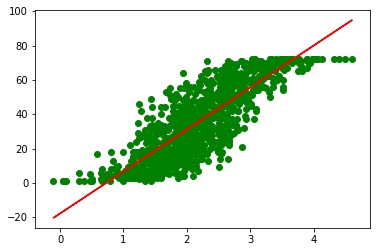

In [9]:
data_set['longmon_ln'] = data_set['longmon'].apply(lambda x: 0 if x ==0 else math.log(x))
X = data_set['longmon_ln'].astype(float)
Y = data_set['tenure']
model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()
# results.params
intercept, slope  = results.params
line = slope*X+intercept
plt.clf()
plt.plot(X, line, 'r', )
plt.scatter(X, Y, color='green')
plt.show()

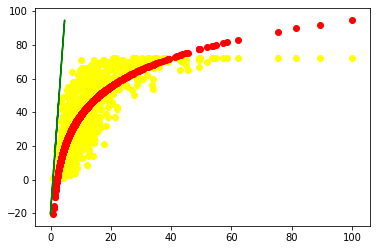

In [10]:
N=1000
x= data_set['longmon']
y = data_set['tenure']
power_guess=0.1  
b0 = intercept
b1 = slope
power,cov,infodict,mesg,ier = optimize.leastsq(
    residuals,power_guess,args=(b0,b1,y),full_output=True)
y_fit=get_model(power,b0,b1)

plt.scatter(x, y, color="yellow")
plt.scatter(x, y_fit, color="red")
plt.plot(X, line, 'g', )
plt.show()

2 (c) Explain in your own words, why all the classical tests and inferences are not
directly applicable to the NLS estimators.

For the large number of parameters with a small observations we will have a large variances and as a result unreliable tests and huge inferences.

2 (d) What kind of problems might arise if we decide to fit a non-linear regression using
all explanatory variables?



High variances and linearity increase of the variance can cause of becoming the non-linear model bias.

3. Next we model the relationship between tenure and address using the nonparametric Nadaraya-Watson regression.

3 (a) An important calibration parameter of a nonparametric regression is the band-
width. Explain what happens with the regression/the weights in the Nadaraya-
Watson regression if the bandwidth is too high or too small.



The density function will not be smooth, if the bandwidth is too small. If it is too huge - it will be too flat and will not represent the actual shape.

3 (b) Fit a Nadaraya-Watson regression with Gaussian kernel and “optimal” bandwidth
to the longmon/address data. Check and explain how the “optimal bandwidth”
is determined in your software. Compare the (in-sample) fit of the nonparametric
regression and the nonlinear regression in the previous subproblem.


In [11]:
x = data_set['address']
y = data_set['tenure']

R2 0.27770519056147275


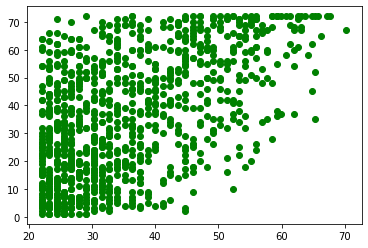

In [12]:
model = KernelReg(endog=y, exog=x, var_type='c')
results = model.fit()
plt.scatter(pd.Series(results[0]),y , color='green')
print("R2",model.r_squared())

By default method for bandwidth selection is ‘cv_ls’ (least-squares cross-validation)

In [13]:
# Nadaraya-Watson prediction
model.fit(x[21:22])

(array([42.41138129]), array([[1.20675894]]))

In [14]:
# Non-linear model predicion
get_model(b0,b1, x[21:22])[22]

-832.9782705409434

Diagram shows that Nadaraya Watson gave more trully results

4. Next we consider classification of the clients using the churn variable as the dependent
variable and the logistic regression.

4 (a) Fit a logistic regression to explain churn by the remaining explanatory variables.

In [15]:
data_set = pd.read_csv('telco.csv', sep='	')
categories = ['churn', 'marital', 'ed', 'retire', 'gender']
for var in categories:
    data_set=data_set.join(pd.get_dummies(data_set[[var]], prefix=var))
    data_vars=data_set.columns.values.tolist()
    
to_keep=[i for i in data_vars if i not in categories]
data_set = data_set[map(lambda x :x not in ['churn','marital', 'ed', 'retire', 'gender', 'marital_Unmarried', 'retire_No', 'gender_Female', 'churn_No'], list(data_set.columns))]

In [16]:
str(data_set.columns.tolist())
ed = ['ed_College degree', 'ed_Did not complete high school', 'ed_High school degree', 'ed_Post-undergraduate degree', 'ed_Some college']

X = data_set.loc[:, data_set.columns != 'churn_Yes']
y = data_set.loc[:, data_set.columns == 'churn_Yes']
rfe = RFE(LogisticRegression(), 20)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [17]:
# Logistic regression
print(sm.Logit(y,X).fit().summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                                Results: Logit
Model:                    Logit                  Pseudo R-squared:       inf   
Dependent Variable:       churn_Yes              AIC:                    inf   
Date:                     2020-02-07 17:34       BIC:                    inf   
No. Observations:         1000                   Log-Likelihood:         -inf  
Df Model:                 14                     LL-Null:                0.0000
Df Residuals:             985                    LLR p-value:            1.0000
Converged:                1.0000                 Scale:                  1.0000
No. Iterations:           7.0000                                               
-------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


4 (b) Consider the explanatory variable tenure. Obviously its parameter cannot be
interpreted in the same way as for a linear regression. Provide the correct inter-
pretation using the parameter and using odds.



The probability of contact termination decreased by 0.0317 after client's increasing of usage period by 1 month

4 (c) Run a stepwise model selection using AIC as criterion. Further consider only
the optimal model chosen here. From the final model, which of the variables do
increase the probability of churn and which variables decrease this probability?
Is this consistent with economic intuition?

In [18]:
feature_list = X.columns.tolist()
feature_list = [i for i in feature_list if i not in ed]
feature_list.append(ed)

feature_list1 = []
for i in range(len(feature_list)):
    feature_list1.append(list(map(list, itertools.combinations(feature_list, i))))
    
feature_list = feature_list1[3:]

def Flatten(xs):
    res = []
    def loop(ys):
        for i in ys:
            if isinstance(i, list):
                loop(i)
            else:
                res.append(i)
    loop(xs)
    return res

stat = pd.DataFrame()

for a in feature_list:
    for l in a:
        flatten = Flatten(l)      
        x = data_set[Flatten(l)]
        logit_model=sm.Logit(y,x)
        result=logit_model.fit()
        aic0 = result.aic
        feature = Flatten(l)
        stat = stat.append({'feature': feature, 'aic': result.aic}, ignore_index=True)

stat.sort_values(by=['aic']).head(10)
stat.loc[stat['aic'] == stat['aic'].min()]

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: 261.835354
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 262.167367
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization ter

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated succes

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: 262.171301
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated succes

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated succes

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated succes

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated succes

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated succes

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated succes

         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function valu

         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function valu

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated succes

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated succes

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated succes

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated succes

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated succes

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated succes

         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimiza

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated succes

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated succes

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 6
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated succes

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated succes

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7
Optimization terminated successfully.
         Current function value: inf
         Iterations 7


,aic,feature
156,262849.56637,"[wiremon, marital_Married, gender_Male]"


In [19]:
logit_model=sm.Logit(y,data_set[['wiremon', 'marital_Married', 'gender_Male']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 131.421783
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: inf        
Dependent Variable: churn_Yes        AIC:              262849.5664
Date:               2020-02-07 17:34 BIC:              262864.2896
No. Observations:   1000             Log-Likelihood:   -1.3142e+05
Df Model:           2                LL-Null:          0.0000     
Df Residuals:       997              LLR p-value:      1.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
wiremon             0.0018   0.0033  0.5443 0.5862 -0.0047  0.0082
marital_Married    -0.8003   0.1181 -6.7796 0.0000 

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull



From the final model, which of the variables do increase the probability of churn and which variables decrease this probability? Is this consistent with economic intuition?

Wiremon is insignificant. But we if consider it in the selected model, it could be interpreted as follows: the increase by internet usage in the last month, increase the probability of contract termination by 0.18%. It seems economically reasonable. People who use internet, can use it for voice calls.

Being married decrease the probability of conctract termination by 80%. It is also seems consistent.

Being male decrease the the probability of conctract termination by 65%. It seems a bit strange.

4 (d) Randomly pick up five clients. Determine their probabilities of leaving the com- pany. Provide for the first of them the formula which may be used to compute this probability with inserted values of parameters and variables. If you want to predict the membership in one of the two groups for a particular client, what is the simplest way to proceed using these probabilities?

In [20]:
for i in np.random.randint(1, 1000, size=5):
    print("for observation # ", i+1, " actual churn is ", list(y[i:i+1].values[0]),"while predicted probability for ",
          str(result.predict(data_set[['wiremon', 'marital_Married', 'gender_Male']][i:i+1])))

for observation #  111  actual churn is  [0] while predicted probability for  111    0.309953
dtype: float64
for observation #  102  actual churn is  [0] while predicted probability for  102    0.309953
dtype: float64
for observation #  708  actual churn is  [0] while predicted probability for  708    0.5
dtype: float64
for observation #  428  actual churn is  [0] while predicted probability for  428    0.309953
dtype: float64
for observation #  742  actual churn is  [0] while predicted probability for  742    0.205326
dtype: float64


- Formula for probability calculation in our case is as follows:
- 0.001788 * wiremon - 0.800338 * marital_Married - 0.652968 * gender_Male
- For prediction of class we need to choose threshold.

4 (e) Compute the classification table and calculate the specificity and sensitivity. Pro- vide verbal interpretation for the elements of the classification table and the per- formance measures.

In [21]:
# Lets choose  threshold 

threshold=0.5

predicted_values = result.predict()
predicted_class=np.zeros(predicted_values.shape)
predicted_class[predicted_values>threshold]=1

# Classification table, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y,predicted_class)
print('Classification table : \n', cm)

total=sum(sum(cm))
# from classification table calculate accuracy
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Classification table : 
 [[684  42]
 [247  27]]
Accuracy :  0.711
Sensitivity :  0.9421487603305785
Specificity :  0.09854014598540146


4 (f) To improve the performance it makes sense to change the threshold used for clas- sification. This can be done using the ROC curve. Plot this curve and determine the optimal threshold.

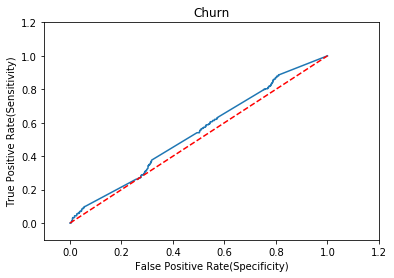

In [22]:
actual = y
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted_values)
plt.title('Churn')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

In [23]:
threshold = auc(false_positive_rate, true_positive_rate)
threshold

0.5398795519897046

4 (g) Recompute the classification table, sensitivity and specificity for the new thresh-
old. Provide interpretation of the obtained values. Compare the results with the
original values. Is the procedure now more strict/conservative?

In [24]:
predicted_values = result.predict()
predicted_class=np.zeros(predicted_values.shape)
predicted_class[predicted_values>threshold]=1

# Classification table, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y,predicted_class)
print('Classification table : \n', cm)

total=sum(sum(cm))
# from classification table calculate accuracy
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Classification table : 
 [[725   1]
 [274   0]]
Accuracy :  0.725
Sensitivity :  0.9986225895316805
Specificity :  0.0


5 In the next step we model tenure using regression trees.
(a) Assume the first variable to be used for splitting is longmon. Write down the corresponding optimization problem and explain how the optimization works.

The idea behind any decision tree algorithm is to choose parameter to split our data into smaller subsets. Perform tree building by repeating this process recursively for each child until one of the condition will match:
    All the tuples belong to the same attribute value.
    There are no more remaining attributes.
    There are no more instances. 

We introduce penaltization factor for quantity of nodes, so optimization problem will be:  minimize  (y - yR) + alpha * |T|

In [29]:
data = pd.read_csv('telco.csv', sep='	')
ed = data['ed'].unique()
cat_vars = ['churn', 'marital', 'ed', 'retire', 'gender']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[[var]], prefix=var)
    data1=data.join(cat_list)
    data=data1

cat_vars=['churn','marital', 'ed', 'retire', 'gender']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data = data[map(lambda x :x not in ['churn','marital', 'ed', 'retire', 'gender', 'marital_Unmarried', 'retire_No', 'gender_Female', 'churn_No'], list(data.columns))]
data.head(2)

,tenure,age,address,income,employ,longmon,wiremon,churn_Yes,marital_Married,ed_College degree,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male
1,13,44,9,64,5,3.7,0.0,1,1,1,0,0,0,0,0,1
2,11,33,7,136,5,4.4,35.7,1,1,0,0,0,1,0,0,1


In [30]:
x = data.loc[:, data.columns != 'longmon']
y = data.loc[:, data.columns == 'tenure']

dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')